In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

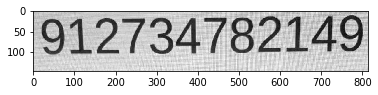

In [2]:
img = cv2.imread('test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
plt.show()

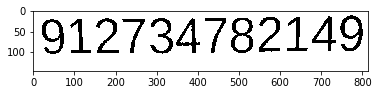

In [3]:
threshold = 75
img_binary = np.vectorize(lambda x: 255 if x > threshold else 0)(img)
plt.imshow(img_binary, cmap='gray')
plt.show()

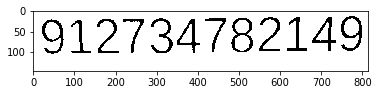

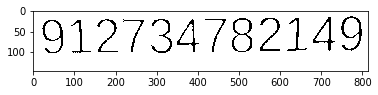

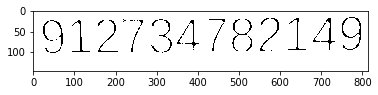

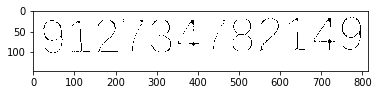

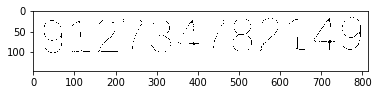

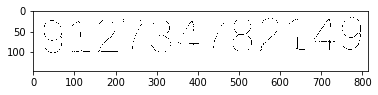

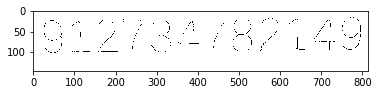

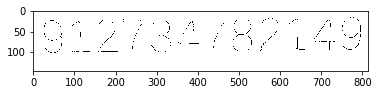

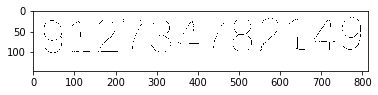

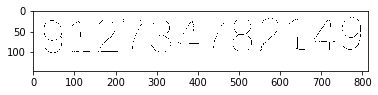

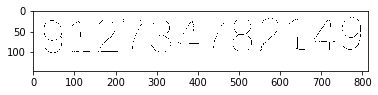

In [4]:
def thinning(image):
    image = image.copy()
    height, width = image.shape
    change = True
    while change:
        change = False
        must_delete = []
        for y in range(height):
            for x in range(width):
                if image[y][x] == 0:
                    p2 = image[y-1][x] if y > 0 else 255
                    p3 = image[y-1][x+1] if y > 0 and x < width-1 else 255
                    p4 = image[y][x+1] if x < width-1 else 255
                    p5 = image[y+1][x+1] if y < height-1 and x < width-1 else 255
                    p6 = image[y+1][x] if y < height-1 else 255
                    p7 = image[y+1][x-1] if y < height-1 and x > 0 else 255
                    p8 = image[y][x-1] if x > 0 else 255
                    p9 = image[y-1][x-1] if y > 0 and x > 0 else 255
                    ps = [p2,p3,p4,p5,p6,p7,p8,p9]
                    np = len(list(filter(lambda x : x == 0, ps)))
                    sp = 0
                    for i in range(len(ps)):
                        j = (i + 1) % len(ps)
                        sp += 1 if ps[i] == 0 and ps[j] == 255 else 0

                    if not(np in [0,1,7,8] or sp >= 2):
                        change = True
                        must_delete += [(x,y)]
        for v in must_delete:
            image[v[1]][v[0]] = 255
        plt.imshow(image, cmap='gray')
        plt.show()
    return image
            
image_thinned = thinning(img_binary)
cv2.imwrite("res.jpg", image_thinned)
plt.imshow(image_thinned, cmap='gray')
plt.show()

begin
2679


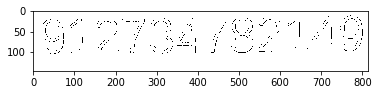

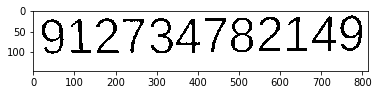

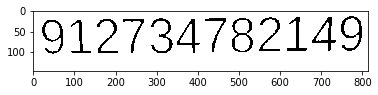

begin
2639


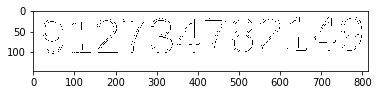

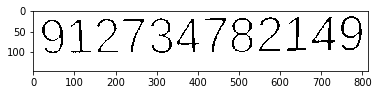

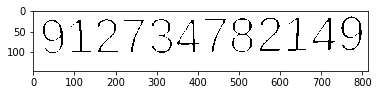

begin
2291


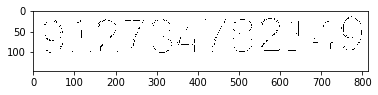

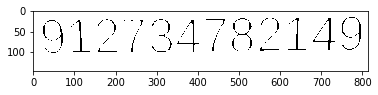

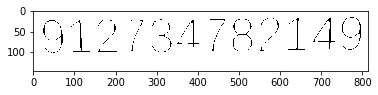

begin
837


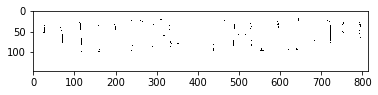

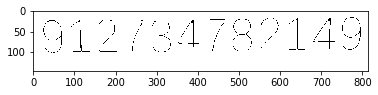

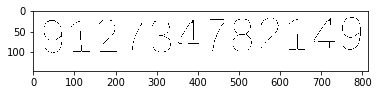

begin
66


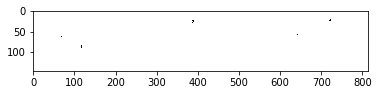

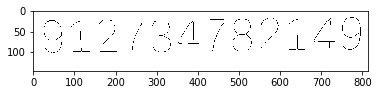

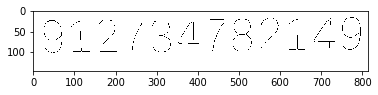

begin
1


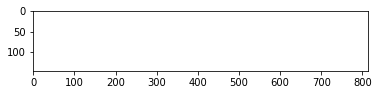

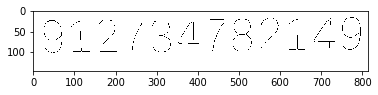

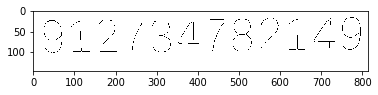

begin
0


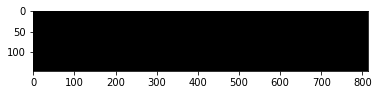

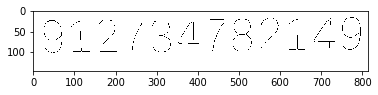

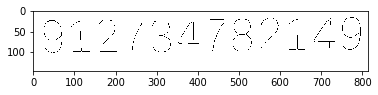

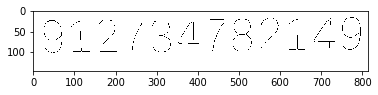

In [5]:
height, width = img_binary.shape

def check_delete(image, y, x):
    if image[y][x] != 0:
        return False
    h, w = image.shape
    p2 = image[y-1][x] if y > 0 else 255
    p3 = image[y-1][x+1] if y > 0 and x < w-1 else 255
    p4 = image[y][x+1] if x < w-1 else 255
    p5 = image[y+1][x+1] if y < h-1 and x < w-1 else 255
    p6 = image[y+1][x] if y < h-1 else 255
    p7 = image[y+1][x-1] if y < h-1 and x > 0 else 255
    p8 = image[y][x-1] if x > 0 else 255
    p9 = image[y-1][x-1] if y > 0 and x > 0 else 255
    ps = [p2,p3,p4,p5,p6,p7,p8,p9]
    np = len(list(filter(lambda x : x == 0, ps)))
    sp = 0
    for i in range(len(ps)):
        j = (i + 1) % len(ps)
        sp += 1 if ps[i] == 0 and ps[j] == 255 else 0
    ret = (2 <= np) and (np <= 6) and (sp == 1) and (p4 == 255 or p6 == 255 or (p2 == 255 and p8 == 255))
    return ret

def check_delete_2(image, y, x):
    if image[y][x] != 0:
        return False
    h, w = image.shape
    p2 = image[y-1][x] if y > 0 else 255
    p3 = image[y-1][x+1] if y > 0 and x < w-1 else 255
    p4 = image[y][x+1] if x < w-1 else 255
    p5 = image[y+1][x+1] if y < h-1 and x < w-1 else 255
    p6 = image[y+1][x] if y < h-1 else 255
    p7 = image[y+1][x-1] if y < h-1 and x > 0 else 255
    p8 = image[y][x-1] if x > 0 else 255
    p9 = image[y-1][x-1] if y > 0 and x > 0 else 255
    ps = [p2,p3,p4,p5,p6,p7,p8,p9]
    np = len(list(filter(lambda x : x == 0, ps)))
    sp = 0
    for i in range(len(ps)):
        j = (i + 1) % len(ps)
        sp += 1 if ps[i] == 0 and ps[j] == 255 else 0
    ret = (2 <= np) and (np <= 6) and (sp == 1) and (p2 == 255 or p8 == 255 or (p4 == 255 and p6 == 255))
    return ret

change = True
it = 0
while change:
    it += 1
    must_delete = []
    print("begin")
    change = False
    for y in range(height):
        for x in range(width):
            if check_delete(img_binary, y, x):
                change = True
                must_delete += [(x,y)]
    
    print(len(must_delete))
    image_del = np.ones((height, width)) * 255
    for v in must_delete:
        image_del[v[1]][v[0]] = 0
    plt.imshow(image_del, cmap='gray')
    plt.show()
    
    for v in must_delete:
        img_binary[v[1]][v[0]] = 255
    
    plt.imshow(img_binary, cmap='gray')
    plt.show()
    
    must_delete = []
    for y in range(height):
        for x in range(width):
            if check_delete_2(img_binary, y, x):
                change = True
                must_delete += [(x,y)]
    for v in must_delete:
        img_binary[v[1]][v[0]] = 255
    must_delete = []
    
    plt.imshow(img_binary, cmap='gray')
    plt.show()
    
    cv2.imwrite("res_%d.jpg" % it, img_binary)

plt.imshow(img_binary, cmap='gray')
plt.show()